In [1]:
import pandas as pd

# Visualizando os Dados

In [2]:
tmdb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/movies/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [4]:
import seaborn as sns

In [5]:
sns.set(rc={'figure.figsize':(15, 8)})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de Votos em Filmes no TMDB 5000')

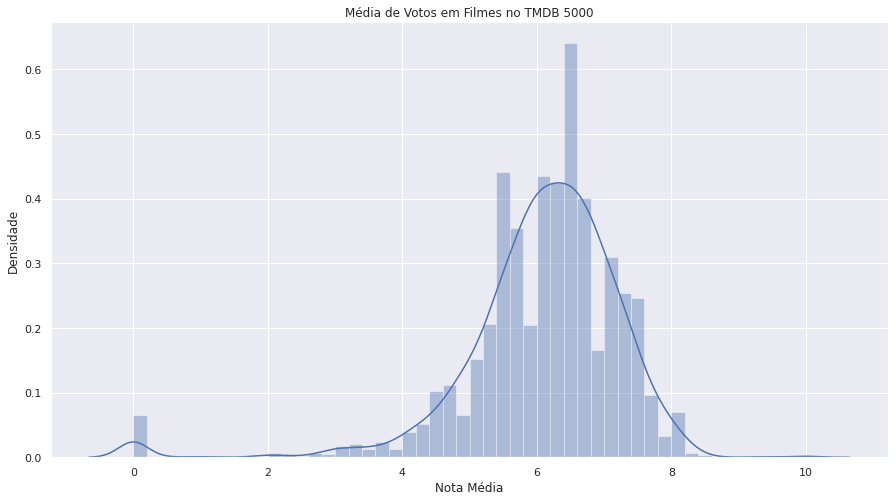

In [6]:
ax = sns.distplot(tmdb.vote_average)
ax.set(xlabel='Nota Média', ylabel='Densidade')
ax.set_title('Média de Votos em Filmes no TMDB 5000')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de Votos em Filmes no TMDB 5000')

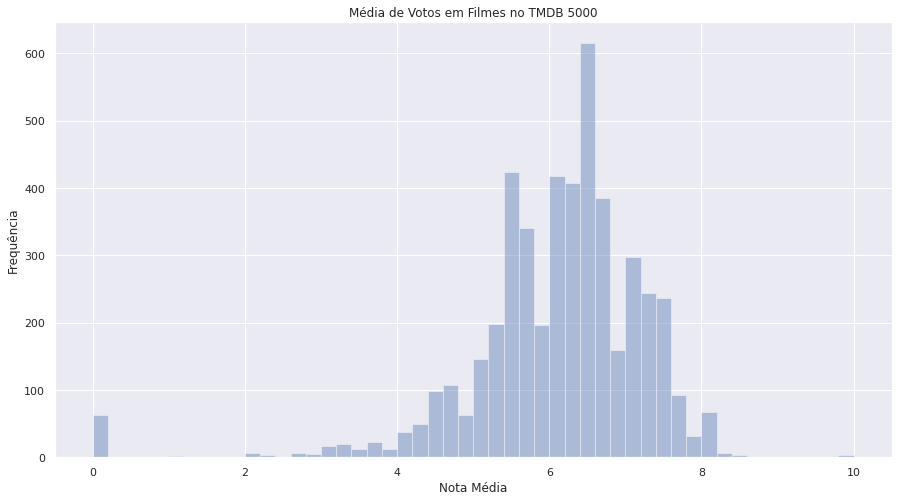

In [7]:
ax = sns.distplot(tmdb.vote_average, norm_hist=False, kde=False)
ax.set(xlabel='Nota Média', ylabel='Frequência')
ax.set_title('Média de Votos em Filmes no TMDB 5000')

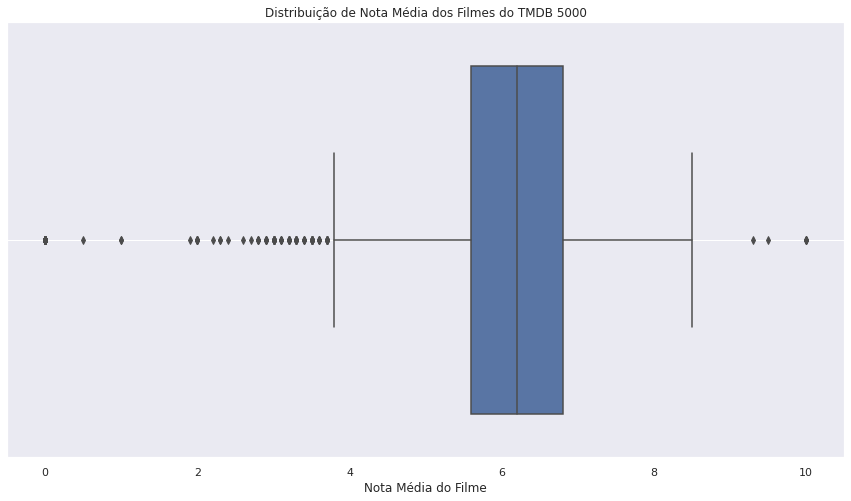

In [8]:
ax = sns.boxplot(x=tmdb.vote_average)
ax.set(xlabel='Nota Média do Filme')
ax.set_title('Distribuição de Nota Média dos Filmes do TMDB 5000')
ax.grid()

**Nota-se que existem filmes com média zero, ou seja, todas as pessoas deram nota zero, o que é difícil. Deve ser analisado (nota 10 também)**

In [9]:
tmdb.query('vote_average == 0').head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


In [10]:
tmdb.query('vote_average == 10')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


**Foram detectados filmes com poucos ou até mesmo zero votos**

In [11]:
tmdb_com_mais_de_10_votos = tmdb.query('vote_count >= 10')
tmdb_com_mais_de_10_votos.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de Votos em Filmes no TMDB 5000 dentre os filmes com mais de 10 ou mais votos')

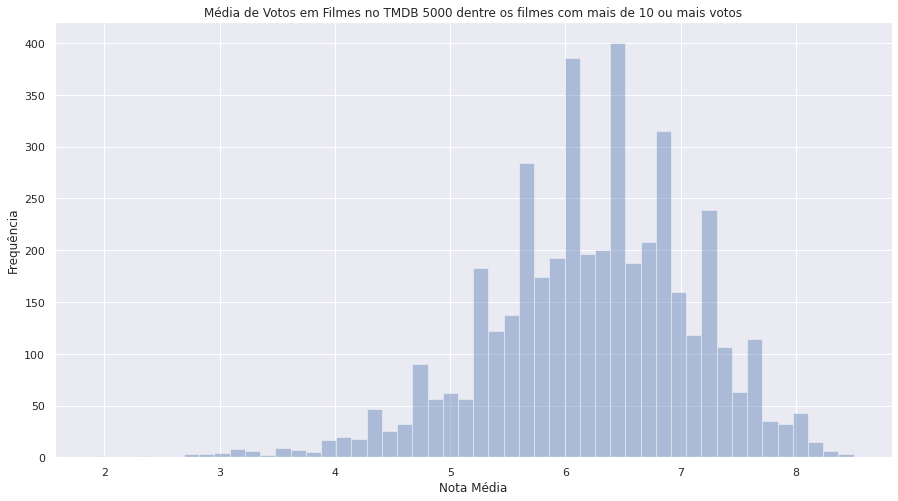

In [12]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, norm_hist=False, kde=False)
ax.set(xlabel='Nota Média', ylabel='Frequência')
ax.set_title('Média de Votos em Filmes no TMDB 5000 dentre os filmes com mais de 10 ou mais votos')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de Votos em Filmes no TMDB 5000 dentre os filmes com mais de 10 ou mais votos')

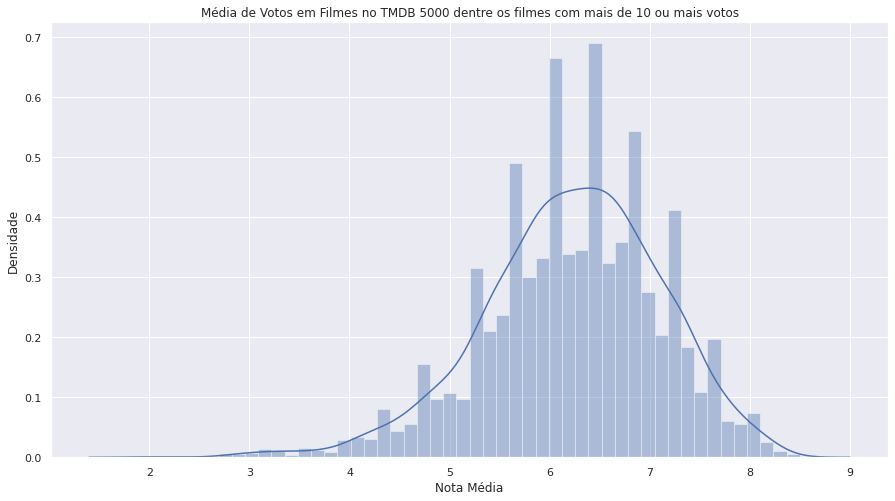

In [13]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel='Nota Média', ylabel='Densidade')
ax.set_title('Média de Votos em Filmes no TMDB 5000 dentre os filmes com mais de 10 ou mais votos')

## Análise do Movielens

In [14]:
notas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/movies/ratings.csv')

In [15]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
nota_media_por_filme = notas.groupby('movieId').mean()['rating']
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de Votos em Filmes no Movielens 100k')

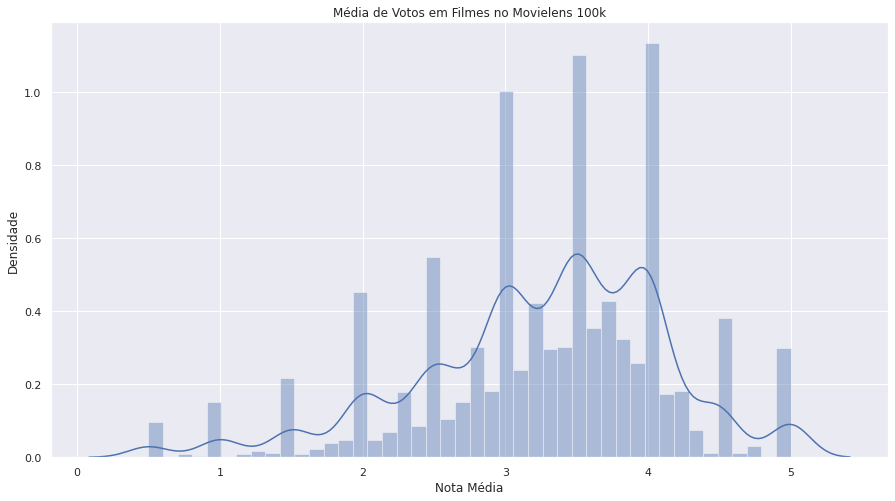

In [17]:
ax = sns.distplot(nota_media_por_filme.values)
ax.set(xlabel='Nota Média', ylabel='Densidade')
ax.set_title('Média de Votos em Filmes no Movielens 100k')

In [18]:
quantidade_de_votos_por_filmes = notas.groupby('movieId').count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filmes.query('rating >= 10').index
filmes_com_pelo_menos_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

In [19]:
notas_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos]
notas_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de Votos em Filmes no Movielens 100k com 10 ou mais votos')

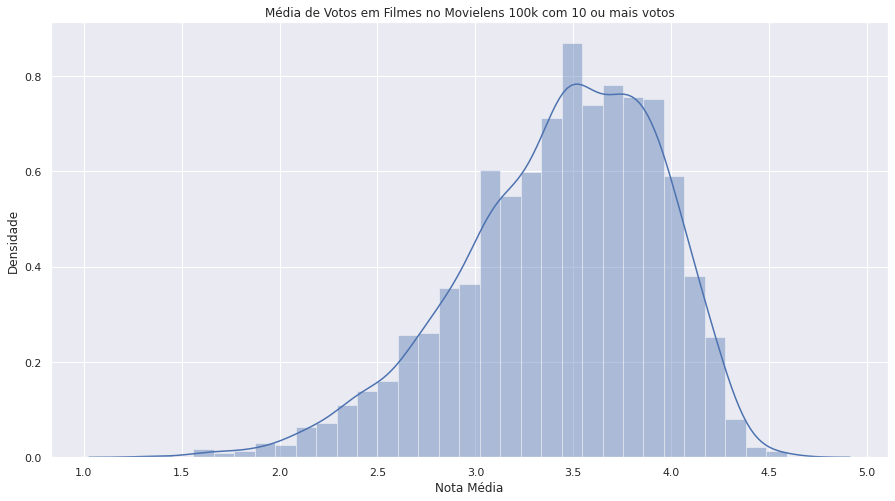

In [20]:
ax = sns.distplot(notas_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel='Nota Média', ylabel='Densidade')
ax.set_title('Média de Votos em Filmes no Movielens 100k com 10 ou mais votos')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


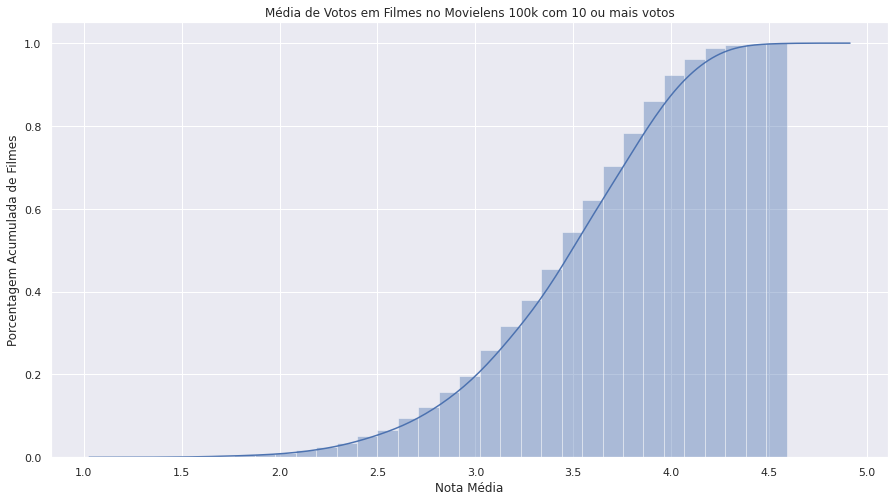

In [21]:
ax = sns.distplot(notas_media_dos_filmes_com_pelo_menos_10_votos.values, hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
ax.set(xlabel='Nota Média', ylabel='Porcentagem Acumulada de Filmes')
ax.set_title('Média de Votos em Filmes no Movielens 100k com 10 ou mais votos')
ax.grid(True)

**Um filme com nota média de 4 está acima dos 80%**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribuição de Nota Média dos Filmes do Movielens 100k com 10 ou mais votos')

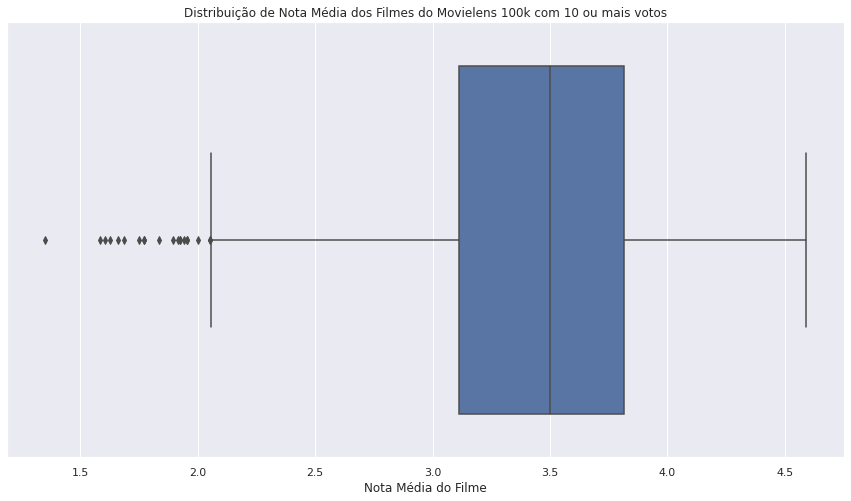

In [22]:
ax = sns.boxplot(notas_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel='Nota Média do Filme')
ax.set_title('Distribuição de Nota Média dos Filmes do Movielens 100k com 10 ou mais votos')

# Analisando a Distribuição dos Dados Capturados de Outros Campos do TMDB

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Número de Votos em Filmes no TMDB 5000 com 10 ou mais votos')

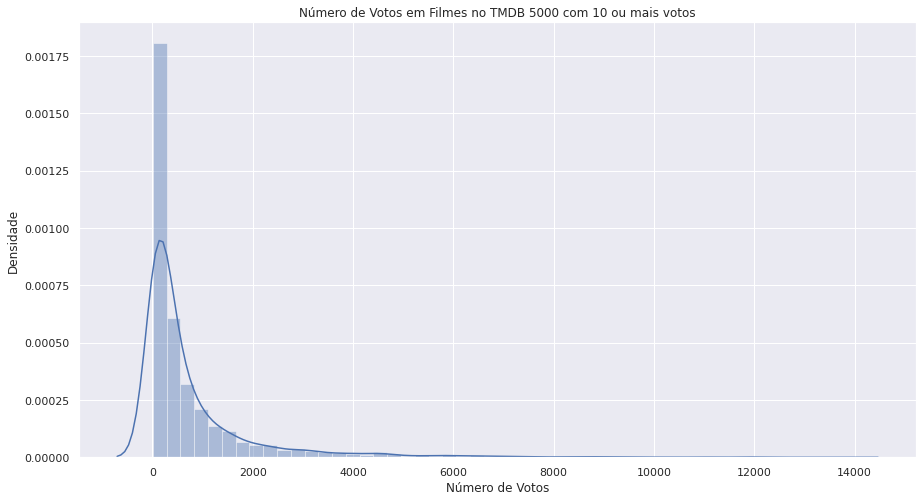

In [23]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.set(xlabel='Número de Votos', ylabel='Densidade')
ax.set_title('Número de Votos em Filmes no TMDB 5000 com 10 ou mais votos')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gastos em Filmes no TMDB 5000')

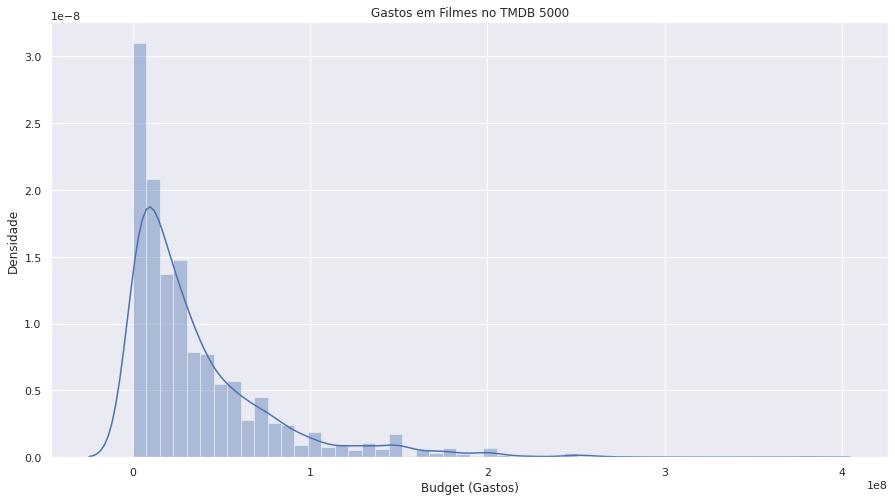

In [24]:
ax = sns.distplot(tmdb.query('budget > 0').budget)
ax.set(xlabel='Budget (Gastos)', ylabel='Densidade')
ax.set_title('Gastos em Filmes no TMDB 5000')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularidade em Filmes no TMDB 5000')

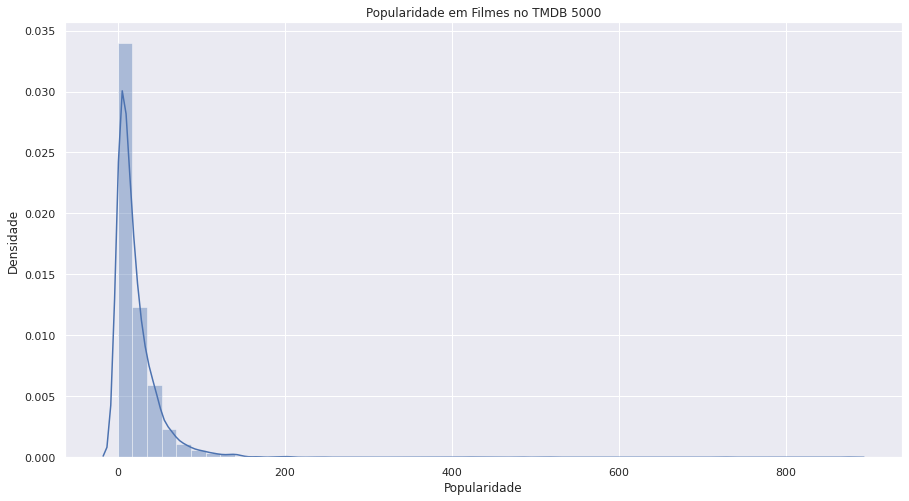

In [25]:
ax = sns.distplot(tmdb.popularity)
ax.set(xlabel='Popularidade', ylabel='Densidade')
ax.set_title('Popularidade em Filmes no TMDB 5000')

In [26]:
# Checando Valores Nulos
tmdb.runtime.isnull().sum()

2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tempo de Duração em Filmes no TMDB 5000')

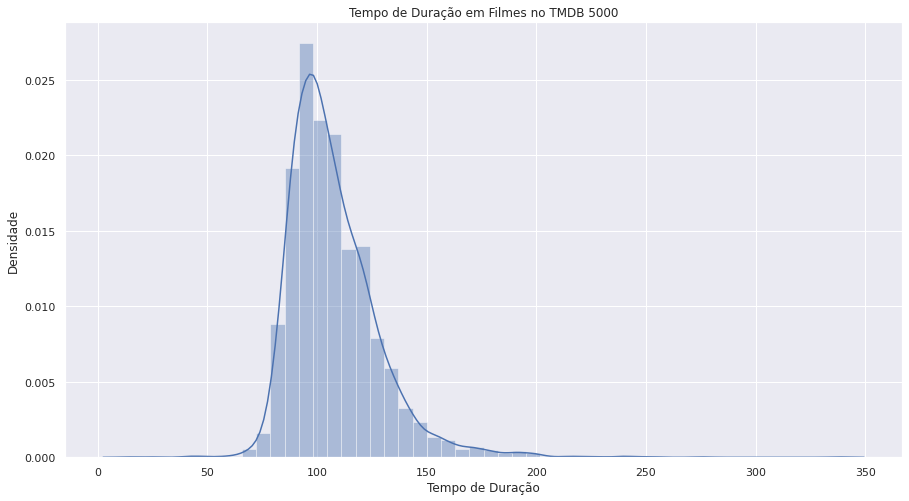

In [27]:
ax = sns.distplot(tmdb.query('runtime > 0').runtime.dropna())
ax.set(xlabel='Tempo de Duração', ylabel='Densidade')
ax.set_title('Tempo de Duração em Filmes no TMDB 5000')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tempo de Duração em Filmes no TMDB 5000')

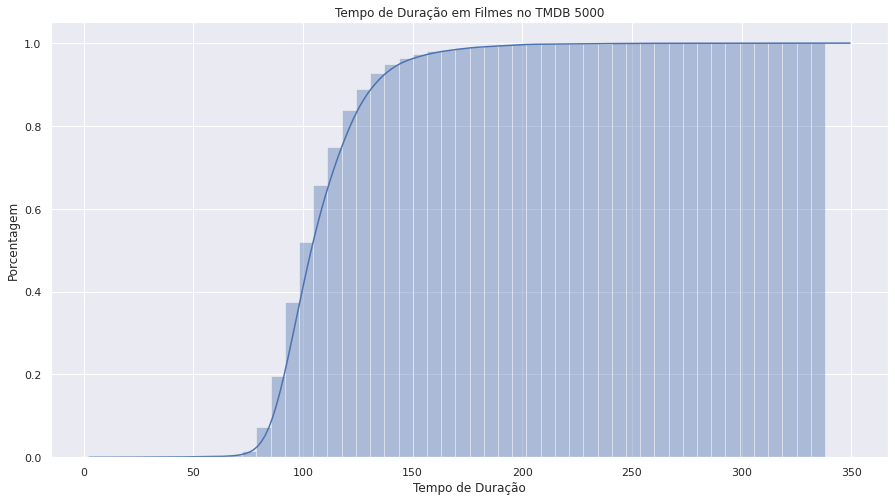

In [28]:
ax = sns.distplot(tmdb.query('runtime > 0').runtime.dropna(), hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
ax.set(xlabel='Tempo de Duração', ylabel='Porcentagem')
ax.set_title('Tempo de Duração em Filmes no TMDB 5000')

In [29]:
# Checando o Tempo de Duração
tmdb.query('runtime > 0').runtime.dropna().quantile(0.8)

121.0

# Comparando as Amostras

In [30]:
print('Média dos Filmes com pelo menos 10 Votos: ', notas_media_dos_filmes_com_pelo_menos_10_votos.mean())

Média dos Filmes com pelo menos 10 Votos:  3.4320503405352603


In [31]:
import matplotlib.pyplot as plt
import numpy as np

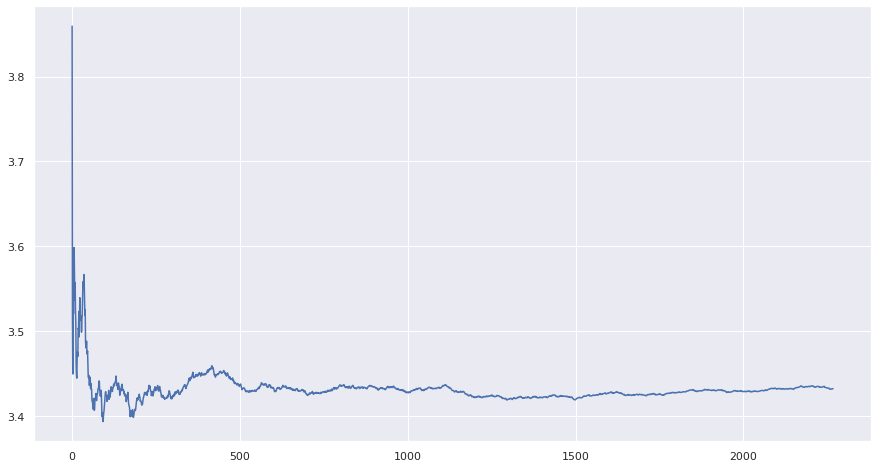

In [32]:
temp = notas_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)    # Pegando todos em uma ordem aleatória

np.random.seed(75243)
temp = notas_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)

medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)

### Afirmando a média para os filmes no geral

In [42]:
from statsmodels.stats.weightstats import zconfint, DescrStatsW, ztest

In [34]:
zconfint(notas_media_dos_filmes_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

In [35]:
descr_todos_com_10_votos = DescrStatsW(notas_media_dos_filmes_com_pelo_menos_10_votos)

In [36]:
descr_todos_com_10_votos.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

# Vamos ver o filme 1

In [37]:
filmes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/movies/movies.csv')
filmes.query('movieId == 1')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [38]:
notas1 = notas.query('movieId == 1')
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição das Notas para o Toy Story')

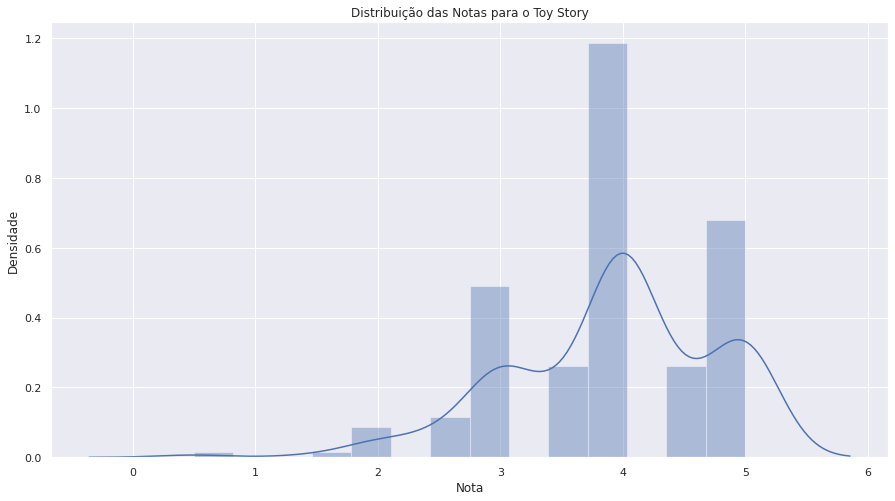

In [39]:
ax = sns.distplot(notas1.rating)
ax.set(xlabel = 'Nota', ylabel = 'Densidade')
ax.set_title('Distribuição das Notas para o Toy Story')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


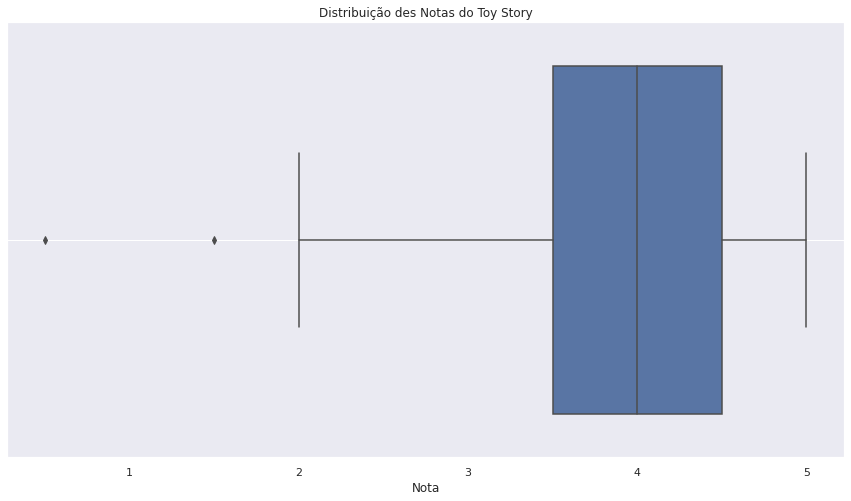

In [40]:
ax = sns.boxplot(notas1.rating)
ax.set(xlabel='Nota')
ax.set_title('Distribuição des Notas do Toy Story')
ax.grid()

In [41]:
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [43]:
ztest(notas1.rating, value = 3.4320503405352603)

(8.586342305916716, 8.978190401886942e-18)

- O segundo valor representa o p-value. Sendo menor do que 5%, a hipótese de que o valor é 3.4320503405352603, é descartada.

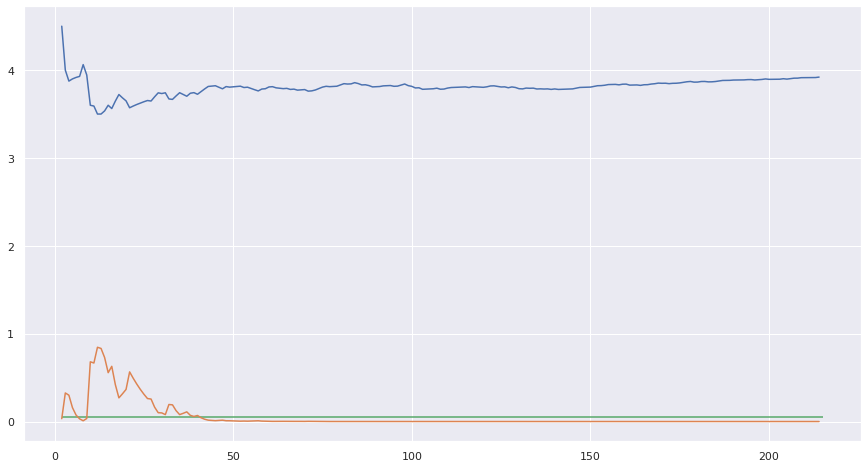

In [50]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

def calcula_teste(i):
  media = temp[0:i].mean()
  stat, pvalue = ztest(temp[0:i], value = 3.4320503405352603)
  return (i, media, pvalue)     # i = número de amostras

valores = np.array([calcula_teste(i) for i in range(2, len(temp))])

plt.plot(valores[:, 0], valores[:, 1])  # Média
plt.plot(valores[:, 0], valores[:, 2])  # p-value
plt.hlines(y = 0.05, xmin=2, xmax=len(temp), color = 'g')

# Comparação de Dois Conjuntos de Amostras

In [52]:
print(ztest(notas1.rating, notas.rating))
zconfint(notas1.rating, notas.rating)

(5.894327101501841, 3.762112778881965e-09)


(0.2799245129192442, 0.5588219849631111)

- Resultados positivos, notas do Toy Story são maiores que as notas gerais

In [55]:
from scipy.stats import ttest_ind

In [57]:
ttest_ind(notas1.rating, notas.rating)

Ttest_indResult(statistic=5.894327101501841, pvalue=3.774003138720876e-09)

In [59]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1.rating)

comparacao = descr_todas_as_notas.get_compare(descr_toystory)
comparacao.summary()    # z-test
#comparacao.summary(use_t=True)   # t-test

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


In [60]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Distribuição das Notas de Acordo com os Filmes')

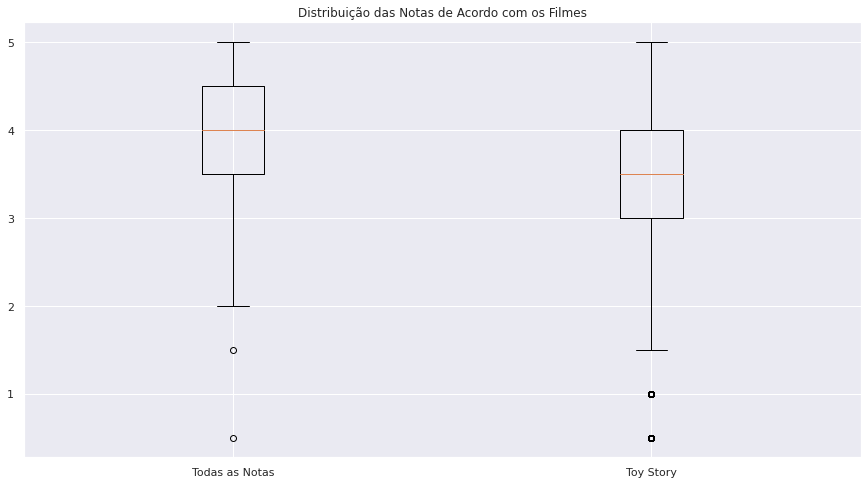

In [63]:
plt.boxplot([notas1.rating, notas.rating], labels=['Todas as Notas', 'Toy Story'])
plt.title('Distribuição das Notas de Acordo com os Filmes')

# Comparando a Média de Dois Filmes

In [64]:
filmes.query('movieId in [1, 593, 72226]')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Distribuição das Notas de Acordo com os Filmes')

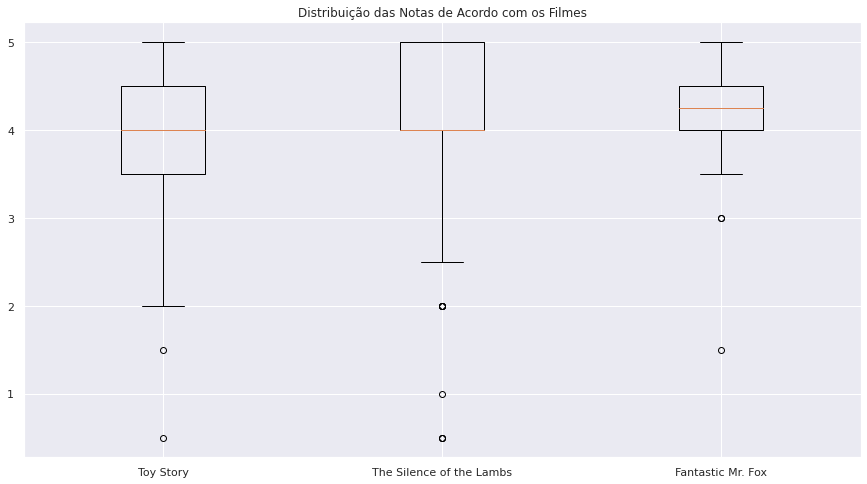

In [65]:
notas593 = notas.query('movieId == 593')
notas72226 = notas.query('movieId == 72226')

plt.boxplot([notas1.rating, notas593.rating, notas72226.rating], labels=['Toy Story', 'The Silence of the Lambs', 'Fantastic Mr. Fox'])
plt.title('Distribuição das Notas de Acordo com os Filmes')

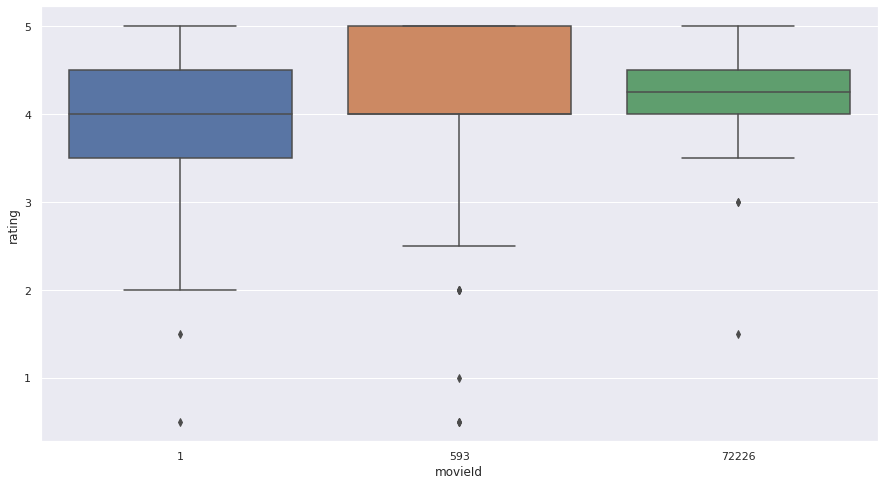

In [67]:
sns.boxplot(x = 'movieId', y = 'rating', data = notas.query('movieId in (1, 593, 72226)'))

In [68]:
descr_1 = DescrStatsW(notas1.rating)
descr_593 = DescrStatsW(notas593.rating)

comparacao = descr_1.get_compare(descr_593)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [69]:
descr_72226 = DescrStatsW(notas72226.rating)
descr_593 = DescrStatsW(notas593.rating)

comparacao = descr_72226.get_compare(descr_593)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332


In [70]:
from scipy.stats import normaltest

In [72]:
# Utiliza underline, pois o primeiro valor não será usada
_, pvalue = normaltest(notas1.rating)
pvalue

0.00011053430732728716

- **Menor do que 5%: Hipótese nula descartada, ou seja, não vem de uma normal, portanto, não se pode aplicar o z_test e o t_test**

## Testes Não-Paramétricos (Curva não normal)

In [73]:
from scipy.stats import ranksums

In [74]:
_, pvalue = ranksums(notas1.rating, notas593.rating)
pvalue

0.0003267718756440693

- p-value menor do que 5%, descarta hipótese nula

- Hipótese Nula: As duas amostras vieram da mesma distribuição
- Hipótese Alternativa: Uma amostra tem tendência de ser maior do que outra amostra